In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [12]:
path = ''
rawdata = pd.read_csv(path)#字段名为中文，编码方式指定为gbk

In [13]:
rawdata.describe()

,class,EVI,EVI_variance,MNDWI,MNDWI_variance,NDBI,NDBI_variance,NDVI,NDVI_variance,NDWI,...,SR_B2_variance,SR_B3,SR_B3_variance,SR_B4,SR_B4_variance,SR_B5,SR_B5_variance,SR_B6,SR_B6_variance,SR_B7
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,289.000000,2.890000e+02,289.000000,2.890000e+02,289.000000,2.890000e+02,289.000000,2.890000e+02,289.000000
mean,2.446367,1.025010,341.413134,-0.024416,0.022125,-0.097391,0.010937,0.114877,0.007879,-0.110679,...,9.045522e+07,10615.830450,7.408582e+07,10506.498270,7.412261e+07,14382.070934,5.333776e+07,12262.877163,2.093613e+07,10549.685121
std,1.348119,1.005647,2029.001574,0.105988,0.019513,0.082826,0.011512,0.121867,0.007395,0.119202,...,5.521805e+07,1993.101545,4.552992e+07,2314.278669,4.505212e+07,3437.379850,3.267819e+07,3322.113324,1.318477e+07,2737.395136
min,0.000000,-0.327969,0.009430,-0.257568,0.001586,-0.311892,0.000345,-0.223688,0.000105,-0.360974,...,1.162786e+06,7927.500000,1.564462e+06,7553.000000,1.680375e+06,7087.000000,1.477863e+06,7342.000000,6.685352e+04,7293.000000
25%,2.000000,0.221184,0.823370,-0.097653,0.007995,-0.156229,0.003191,0.021142,0.001999,-0.210371,...,5.040000e+07,9096.000000,4.090000e+07,8584.000000,3.960000e+07,11749.500000,2.760000e+07,9770.000000,9.838396e+06,8597.500000
50%,2.000000,0.621692,2.865230,-0.049335,0.014833,-0.086684,0.006563,0.085304,0.004807,-0.099744,...,8.040000e+07,10084.000000,6.820000e+07,9983.500000,6.720000e+07,14738.500000,4.980000e+07,11277.500000,2.050000e+07,9380.000000
75%,4.000000,1.756799,17.669651,0.051975,0.029932,-0.035391,0.014132,0.198261,0.012390,-0.018799,...,1.290000e+08,11803.000000,1.070000e+08,11664.000000,1.080000e+08,16921.000000,7.210000e+07,14294.000000,2.900000e+07,12094.000000
max,4.000000,3.845642,26685.587080,0.290441,0.090896,0.075341,0.060323,0.394617,0.033647,0.334550,...,2.470000e+08,21548.500000,2.160000e+08,22689.000000,2.190000e+08,23123.000000,1.600000e+08,25693.500000,6.470000e+07,23328.500000


In [14]:
x = rawdata.drop('class',axis = 1)
y = rawdata['class']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)#30%为测试集，则70%为训练集
x_train.shape#查看训练集数据量
x_test.shape#查看测试集数据量

(87, 24)

from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()#使用默认参数将随机森林分类器实例化
rfc.fit(x_train,y_train)#模型拟合

RandomForestClassifier()

In [17]:
score1 = rfc.score(x_test,y_test)#查看拟合出的分类器在测试集上的效果
print(score1)
#返回值：0.93
#得分高于0.9，表示预测效果较好。
#评分方法2：

0.7701149425287356


In [18]:
importance = rfc.feature_importances_#查看各个特征列的重要性
col = rawdata.columns#查看数据框的全部字段名（包括isrun）,返回格式为Index
import numpy as np
re = pd.DataFrame({'特征名':np.array(col)[:-1],'特征重要性':importance}).sort_values(by = '特征重要性',axis = 0,ascending = False)
print(re)

               特征名     特征重要性
11              SR  0.075524
13  SR_B1_variance  0.059664
10   NDWI_variance  0.059113
7             NDVI  0.054923
15  SR_B2_variance  0.054538
6    NDBI_variance  0.051148
9             NDWI  0.050523
17  SR_B3_variance  0.046908
2     EVI_variance  0.044266
21  SR_B5_variance  0.042156
18           SR_B4  0.038547
3            MNDWI  0.038328
0            class  0.037975
20           SR_B5  0.036826
23  SR_B6_variance  0.035635
8    NDVI_variance  0.035148
16           SR_B3  0.035115
4   MNDWI_variance  0.034945
14           SR_B2  0.032642
1              EVI  0.030575
12           SR_B1  0.029180
19  SR_B4_variance  0.028458
5             NDBI  0.027026
22           SR_B6  0.020839


In [2131]:
y_pred = rfc.predict(x_test)
print(y_pred)
print(y_test)

[0 4 4 4 1 1 0 4 3 3 2 1 3 4 0 1 4 1 2 2 2 4 4 4 4 4 4 4 4 2 4 3 3 4 4 3 4
 4 3 0 2 2 1 1 1 4 2 4 2 2 0 1 2 4 4 2 1 3 0 3 4 2 4 0 3 2 4 3 4 2 2 4 1 2
 4 4 2 2 3 3 4 1 2 1 0 2 3]
55     0
182    2
92     4
209    4
261    1
      ..
167    2
271    1
54     0
129    2
18     3
Name: class, Length: 87, dtype: int64


In [2132]:
f1_score(y_test, y_pred, average='macro')

0.8498269581056466

In [2136]:
confusion_matrix(y_test, y_pred)

array([[ 7,  0,  0,  0,  1],
       [ 0, 12,  0,  2,  0],
       [ 1,  0, 18,  2,  3],
       [ 0,  0,  1, 10,  0],
       [ 0,  1,  2,  0, 27]], dtype=int64)

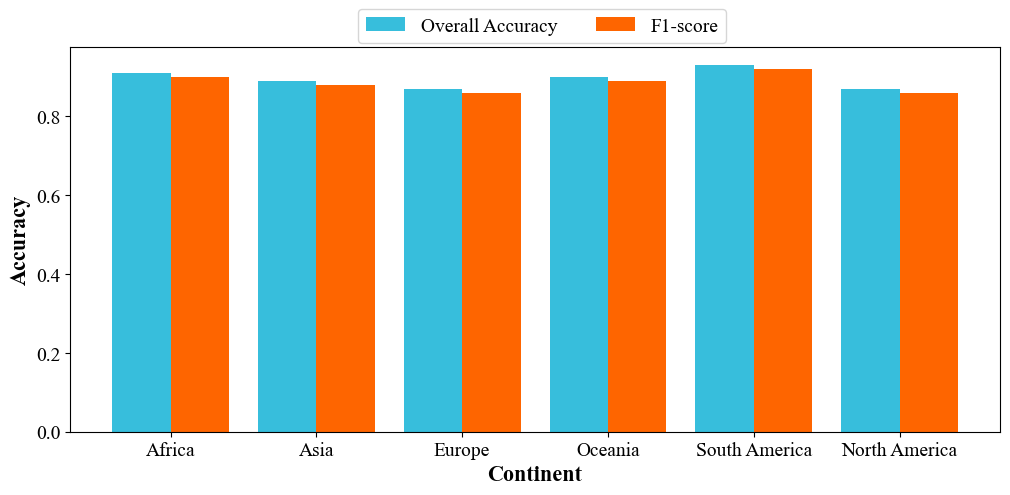

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def drawHistogram():
    matplotlib.rc("font", family='Times New Roman')
    list1 = np.array([0.91, 0.89, 0.87, 0.90, 0.93, 0.87]) 
    list2 = np.array([0.90, 0.88, 0.86, 0.89, 0.92, 0.86]) 
    length = len(list1)
    x = np.arange(length) 
    listDate = ["Africa", "Asia", "Europe", "Oceania", "South America", "North America"]
    y=[0, 0.2, 0.4, 0.6, 0.8, 1.0]
    plt.figure(figsize=(12, 5))
    total_width, n = 0.8, 2   # 柱状图总宽度，有几组数据
    width = total_width / n   # 单个柱状图的宽度
    x1 = x - width / 2   # 第一组数据柱状图横坐标起始位置
    x2 = x1 + width   # 第二组数据柱状图横坐标起始位置

    # plt.xlabel("星期")   # 横坐标label 此处可以不添加
    plt.ylabel("Accuracy",fontsize=16,weight='bold') 
    plt.xlabel("Continent",fontsize=16,weight='bold')
    plt.bar(x1, list1, width=width, label="Overall Accuracy",color='#37BEDC')
    plt.bar(x2, list2, width=width, label="F1-score",color='#FE6500')
    plt.xticks(x, listDate,fontsize=14)
    plt.yticks(fontsize=14)
    num1 = 0.31
    num2 = 1.01
    num3 = 3
    num4 = 0
    legend= plt.legend(ncol=2,bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4,fontsize=14)
    #legend_text = legend.get_texts()
    #for text in legend_text:
       # text.set_weight('bold')

    plt.savefig('E:\\论文\\全球岸线\\overall accuract.png', dpi=800)
    plt.show()
if __name__ == '__main__':
    drawHistogram()
